#### Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


#### Attribute Information:

1.date: Date in format dd/mm/yyyy
2.time: time in format hh:mm:ss
3.global_active_power: household global minute-averaged active power (in kilowatt)
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5.voltage: minute-averaged voltage (in volt)
6.global_intensity: household global minute-averaged current intensity (in ampere)
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

##### Dataset Link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import operator as op

from sklearn.impute import SimpleImputer

import seaborn as sns
sns.set(rc={'figure.figsize': (12,8)})


In [2]:
df = pd.read_csv('household_power_consumption.txt',sep=";")
df.head()

C:\Windows\Temp\ipykernel_10028\3697064285.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt',sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# Count the number of null values
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [4]:
# Check the shape of dataset (No. of rows and No. of Columns)

df.shape

(2075259, 9)

In [5]:
df.describe(include='all')

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2.049280e+06
unique,1442,1440,6534,896,5168,377,153,145,NaN
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000,NaN
freq,1440,1442,25979,472786,25979,169406,1840611,1408274,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [6]:
df.isnull().any(axis = 1).sum()

25979

#### There are some options for dealing with with missing values 'nan'.
###### 1: Fill NaN with Outlier or Zero.
###### 2: Fill NaN with Mean Value or other values.
###### 3: Fill NaN with Last Value with .ffill()
###### 4: Fill NaN with Linearly Interpolated Value with .interpolate().

In [7]:
# fill missing values row wise and making the changes permanent in the original dataframe

df.ffill(axis=0,inplace=True)

In [8]:
# Cross check whether all missing values are filled

df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
df.shape

(2075259, 9)

In [10]:
# Feature Modification
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df.replace(['?', 'nan', np.nan], -1, inplace=True) 
num_vars= ['Global_active_power', 'Global_reactive_power', 'Voltage', 
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [11]:
for i in num_vars:
    df[i] = pd.to_numeric(df[i])
imp = SimpleImputer(missing_values=-1, strategy='mean')
df[num_vars] = imp.fit_transform(df[num_vars])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [12]:
# Target Variable
eq1 = (df['Global_active_power']*1000/60) 
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = eq1 - eq2
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [13]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'power_consumption'],
      dtype='object')

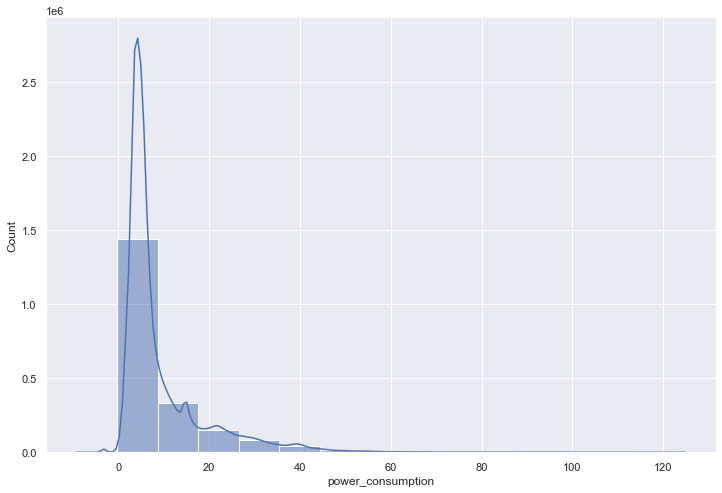

In [14]:
# Distribution of the target variables
sns.histplot(data=df, x='power_consumption', bins=15, kde=True)
plt.show()

##### Heatmap

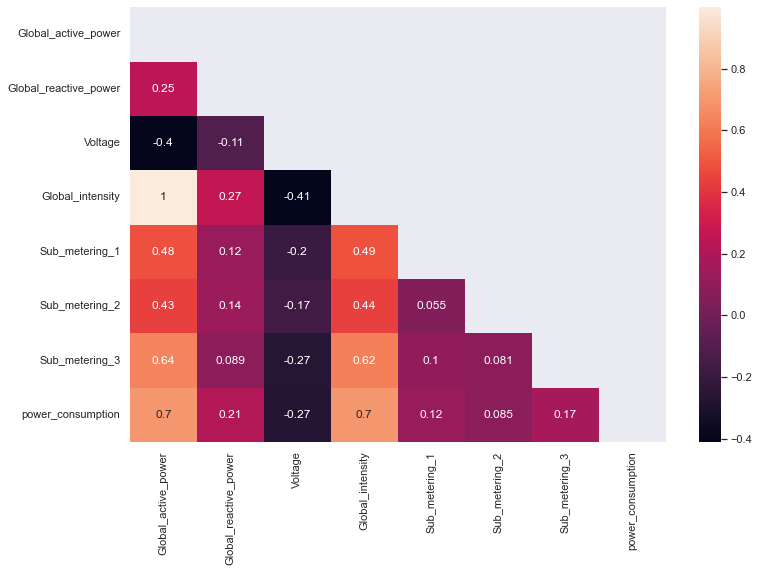

In [15]:
corr = np.corrcoef(df.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()

In [16]:
corr = df.corr(method='pearson')
print("Correlation of the Dataset:",corr)

Correlation of the Dataset:                        Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.635876               0.089240 -0.267047   
power_consumption                 0.699097               0.210935 -0.270488   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.41

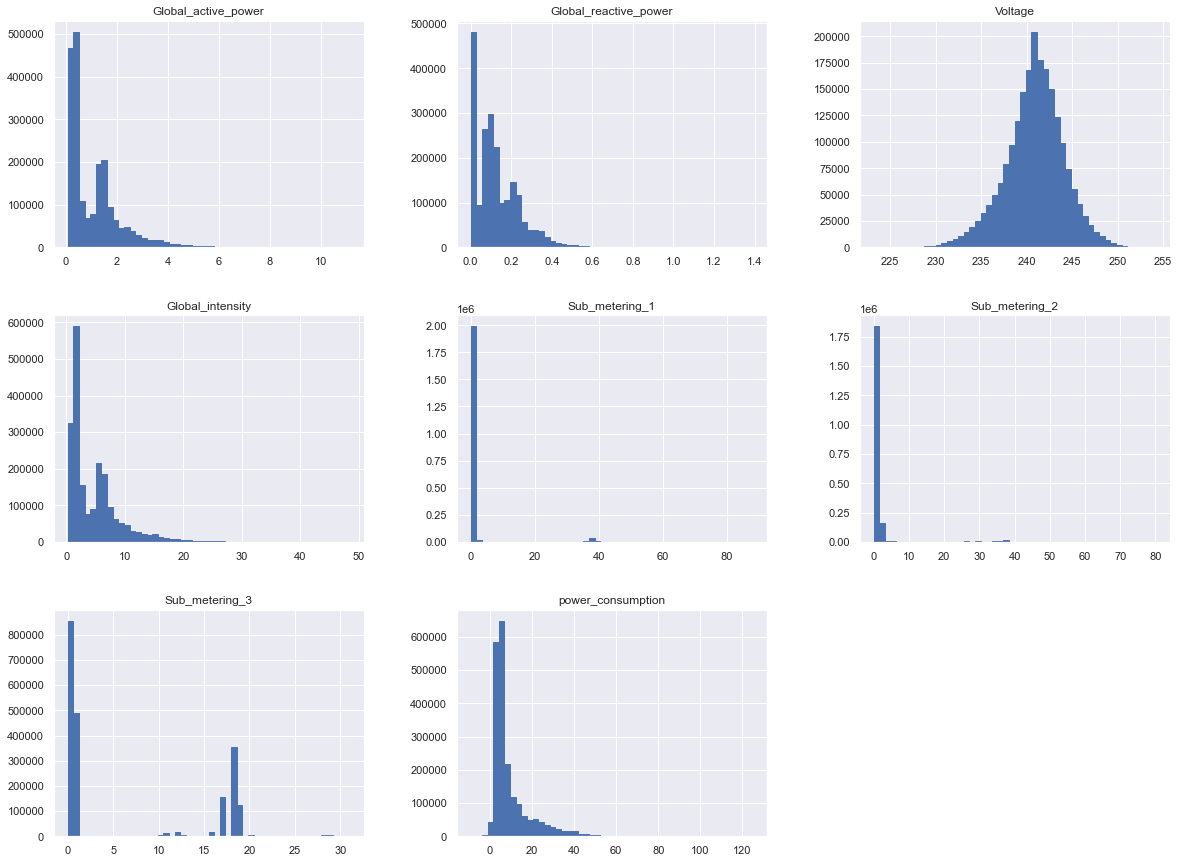

In [17]:
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [18]:
# sns.regplot(data=df,x="Global_reactive_power",y="Voltage")

In [19]:
X = df.drop(['power_consumption','Date','Time'], axis=1).values
Y = df['power_consumption'].values

In [20]:
X

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

In [21]:
Y

array([52.26666667, 72.33333333, 70.56666667, ..., 15.63333333,
       15.56666667, 15.53333333])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [24]:
X_train

array([[1.7780e+00, 2.1000e-01, 2.4374e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.9000e-01, 6.2000e-02, 2.3772e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.9800e+00, 4.3600e-01, 2.3805e+02, ..., 0.0000e+00, 7.0000e+00,
        1.8000e+01],
       ...,
       [2.1160e+00, 2.3200e-01, 2.3967e+02, ..., 9.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0120e+00, 2.5800e-01, 2.3599e+02, ..., 0.0000e+00, 3.0000e+00,
        0.0000e+00],
       [2.5620e+00, 5.4000e-02, 2.3839e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [25]:
y_train

array([29.63333333,  8.16666667, 24.66666667, ..., 26.26666667,
       30.53333333, 42.7       ])

In [26]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg_pred = reg.predict(X_test)

In [27]:
## residuals
residuals=y_test-reg_pred
residuals

array([6.78923584e-12, 6.29452046e-12, 5.71098724e-12, ...,
       4.70201655e-12, 6.71018796e-12, 6.25277607e-13])

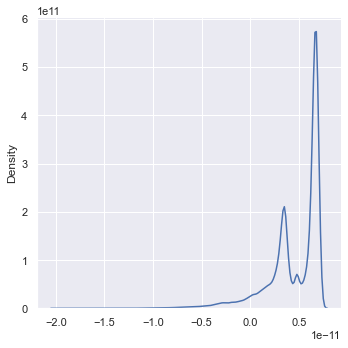

In [28]:
sns.displot(residuals,kind="kde")

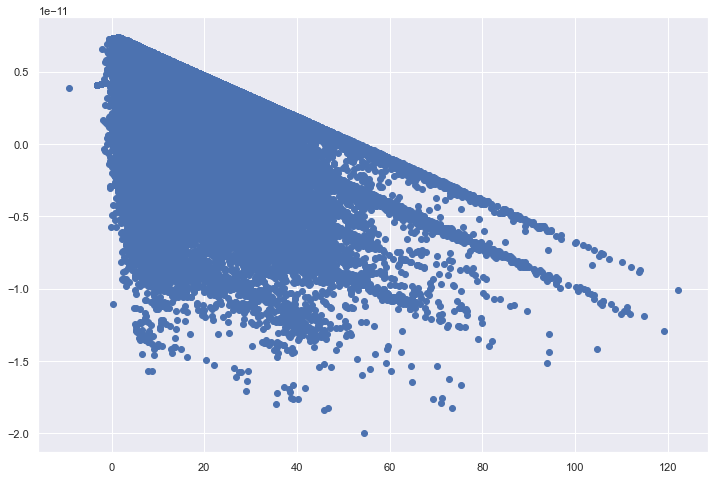

In [29]:
plt.scatter(reg_pred,residuals)

Text(0, 0.5, 'Test Predicted Data')

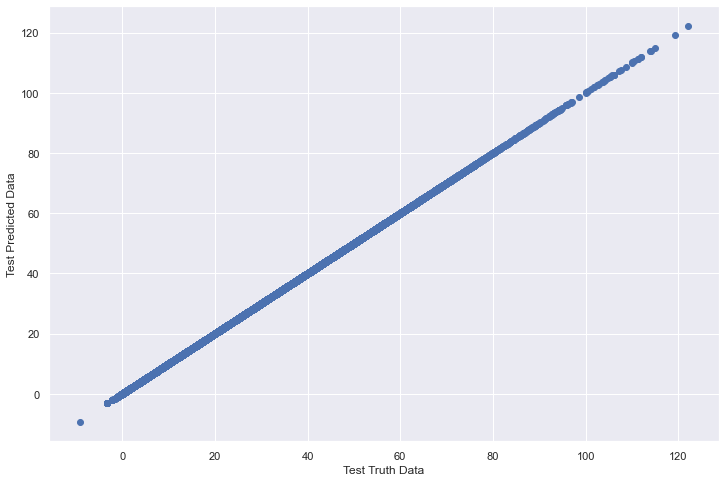

In [30]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

## Performance Metrics
from sklearn.metrics import mean_squared_error   ## MSE
from sklearn.metrics import mean_absolute_error  ## MAE 
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

2.8924933491049666e-23
4.9745488309973314e-12
5.378190540604681e-12


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)

In [34]:
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [36]:
## Prediction for the test data
reg_pred_scaled=reg.predict(X_test_scaled)
reg_pred_scaled

array([ 3.263697  ,  5.76045433, 11.62476027, ...,  3.98306037,
        3.86310887, 46.43417263])

In [37]:
print(reg.intercept_)

9.350838967230835


In [38]:
print(reg.coef_)

[ 1.75071861e+01  3.28626015e-14 -3.17523785e-14 -2.13695728e-12
 -6.11662905e+00 -5.78695987e+00 -8.42111736e+00]


In [39]:
## Performance Metrics
from sklearn.metrics import mean_squared_error   ## MSE
from sklearn.metrics import mean_absolute_error  ## MAE 
print(mean_squared_error(y_test,reg_pred_scaled))
print(mean_absolute_error(y_test,reg_pred_scaled))
print(np.sqrt(mean_squared_error(y_test,reg_pred_scaled)))

0.0007220358598308842
0.01736824147593707
0.026870724959161117


In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

1.0


C:\Users\Shobhandeb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

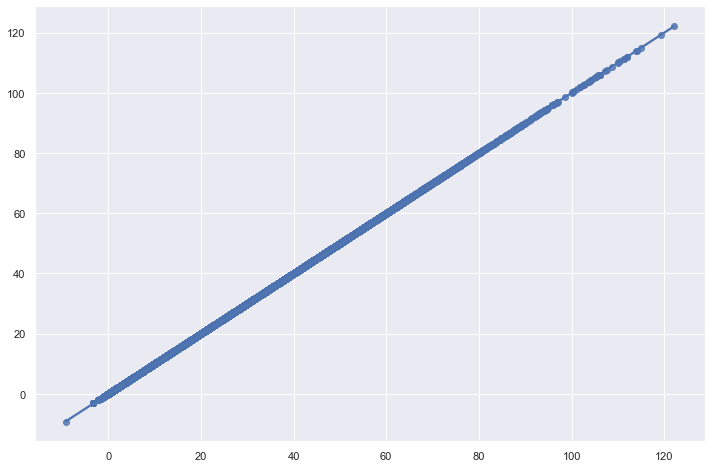

In [41]:
sns.regplot(y_test,reg_pred)

In [42]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

1.0

In [43]:
from sklearn.metrics import r2_score
score_scaled=r2_score(y_test,reg_pred_scaled)
print(score_scaled)

0.9999921215620882


In [44]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score_scaled)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

0.9999921214815584

In [45]:
print("----------------------------------------------Lasso Regression------------------------------------------------")
lasso = Lasso()
lasso.fit(X_train,y_train)
prediction_lasso = lasso.predict(X_test)
score = explained_variance_score(y_test, prediction_lasso)
mae = mean_absolute_error(prediction_lasso,y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

----------------------------------------------Lasso Regression------------------------------------------------
Score: 0.9860306565490398
Mean Absolute Error: 0.7568967353570939


In [46]:
from sklearn.metrics import r2_score
R2_score_lasso=r2_score(y_test,prediction_lasso)
print(R2_score_lasso)

0.986030654475905


In [47]:
from sklearn.metrics import r2_score
R2_score_lasso=r2_score(y_test,prediction_lasso)
print(R2_score_lasso)

0.986030654475905


In [48]:
print(lasso.coef_)

[ 0.         -0.          0.          3.5853411  -0.88014215 -0.88428731
 -0.85229769]


Text(0, 0.5, 'Test Predicted Data')

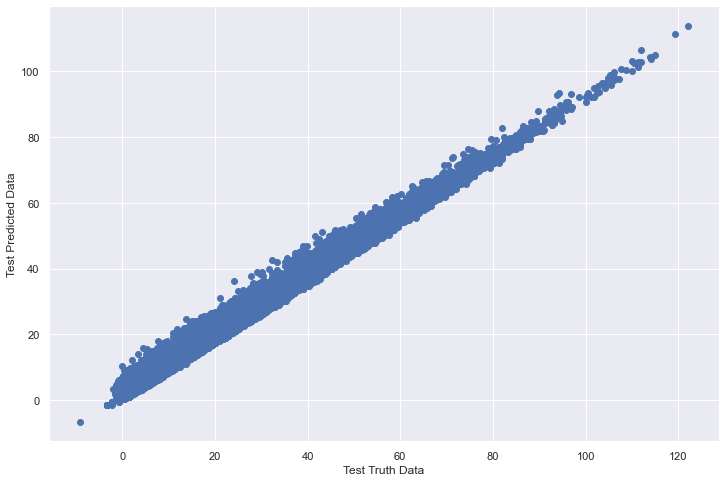

In [49]:
plt.scatter(y_test,prediction_lasso)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")


C:\Users\Shobhandeb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

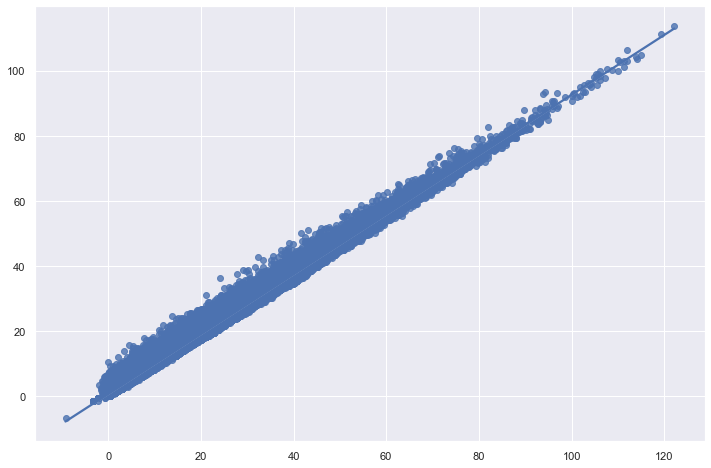

In [50]:
sns.regplot(y_test,prediction_lasso)

In [51]:
## Adjusted R square
#display adjusted R-squared
1 - (1-R2_score_lasso)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9860305116876156

In [52]:
print("----------------------------------------------Lasso Regression With Scaled Data------------------------------------------------")
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
prediction_lasso_scaled = lasso.predict(X_test_scaled)
score_scaled = explained_variance_score(y_test, prediction_lasso_scaled)
mae = mean_absolute_error(prediction_lasso_scaled,y_test)

print("Score:", score_scaled)
print("Mean Absolute Error:", mae)

----------------------------------------------Lasso Regression With Scaled Data------------------------------------------------
Score: 0.7615292349686844
Mean Absolute Error: 3.0248244125903123


In [53]:
print("------------------------------------------------Ridge Regression--------------------------------------------------")
ridge = Ridge()
ridge.fit(X_train,y_train)
prediction_ridge = ridge.predict(X_test)
score = explained_variance_score(y_test, prediction_ridge)
mae = mean_absolute_error(prediction_ridge, y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

------------------------------------------------Ridge Regression--------------------------------------------------
Score: 0.9999999990291548
Mean Absolute Error: 0.00018966115846728577


In [54]:
from sklearn.metrics import r2_score
R2_score_ridge=r2_score(y_test,prediction_ridge)
print(R2_score_ridge)

0.9999999990291499


In [55]:
print(ridge.intercept_)

-0.007872900713653763


In [56]:
print(ridge.coef_)

[ 1.66593043e+01 -1.29543539e-03  3.26525166e-05  1.75304534e-03
 -1.00000253e+00 -1.00000338e+00 -9.99984287e-01]


In [57]:
## Adjusted R square
#display adjusted R-squared
1 - (1-R2_score_ridge)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.99999999902914

In [58]:
print("------------------------------------------------ElasticNet Regression--------------------------------------------------")
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)
prediction_elasticnet = elasticnet.predict(X_test)
score = explained_variance_score(y_test, prediction_elasticnet)
mae = mean_absolute_error(prediction_elasticnet,y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

------------------------------------------------ElasticNet Regression--------------------------------------------------
Score: 0.9758464362189964
Mean Absolute Error: 0.9978200825917457


In [59]:
print(elasticnet.intercept_)

0.7877319724716898


In [60]:
print(elasticnet.coef_)

[ 0.0946939  -0.         -0.          3.36708172 -0.82384712 -0.83067903
 -0.79701427]


In [61]:
from sklearn.metrics import r2_score
R2_score_elasticnet=r2_score(y_test,prediction_elasticnet)
print(R2_score_elasticnet)

0.9758464140759413


In [62]:
## Adjusted R square
#display adjusted R-squared
1 - (1-R2_score_elasticnet)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9758461671889836

In [63]:
print("------------------------------------------------Ridge Regression with Scaled Data----------------------------------------------")
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
prediction_ridge_scaled = ridge.predict(X_test_scaled)
score_scaled = explained_variance_score(y_test, prediction_ridge_scaled)
mae = mean_absolute_error(prediction_ridge_scaled, y_test)

print("Score:", score_scaled)
print("Mean Absolute Error:", mae)

------------------------------------------------Ridge Regression with Scaled Data----------------------------------------------
Score: 0.9999954102873931
Mean Absolute Error: 0.017368250085188313


C:\Users\Shobhandeb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Test Predicted Data')

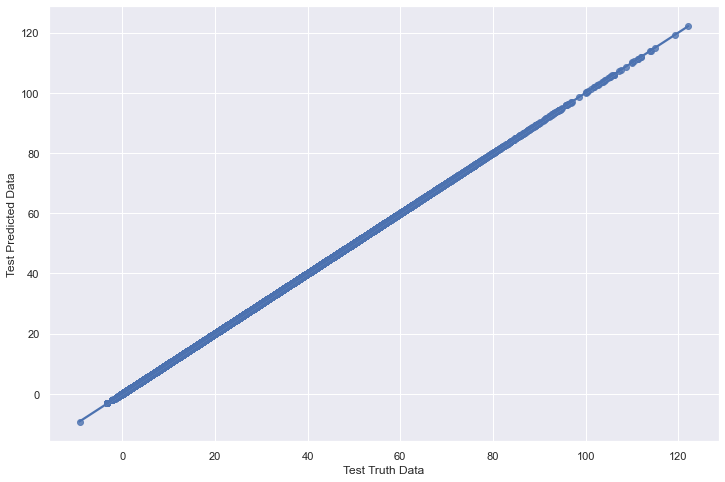

In [64]:
sns.regplot(y_test,prediction_ridge)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [65]:
print("-------------------------------------ElasticNet Regression with Scaled Data--------------------------------------------------")
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
prediction_elasticnet_scaled = elasticnet.predict(X_test_scaled)
score_scaled = explained_variance_score(y_test, prediction_elasticnet_scaled)
mae = mean_absolute_error(prediction_elasticnet_scaled,y_test)

print("Score:",score_scaled)
print("Mean Absolute Error:", mae)

-------------------------------------ElasticNet Regression with Scaled Data--------------------------------------------------
Score: 0.5690312144535741
Mean Absolute Error: 4.150381323410036


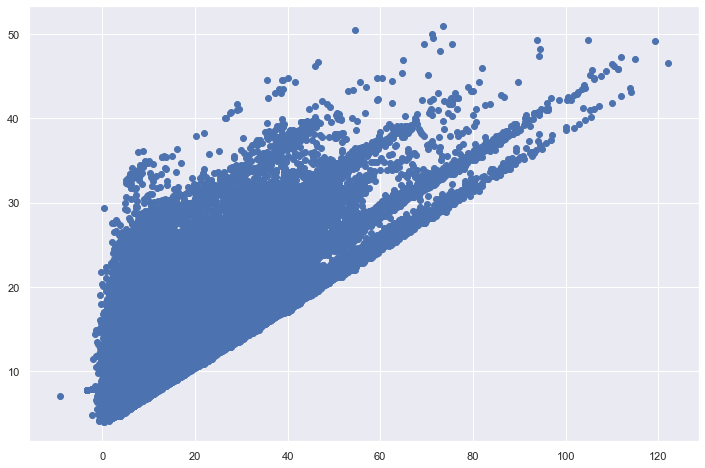

In [66]:
plt.scatter(y_test,prediction_elasticnet_scaled)

C:\Users\Shobhandeb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

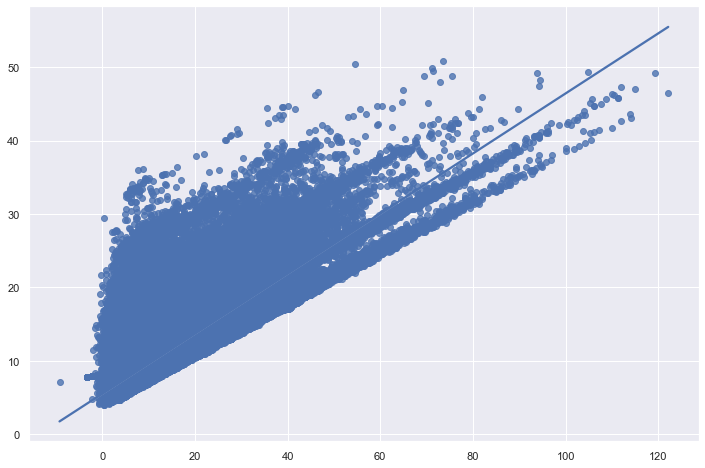

In [67]:
sns.regplot(y_test,prediction_elasticnet_scaled)